## 4 Simulation experiments on the impact of $L$ and strategies
### 4.1 Signals study

In [1]:
import os
path = os.getcwd() + '/Results/'

os.chdir('../')
from inference_mahmm import *

import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 

palette = sns.color_palette("husl", 5)

##### Results recuperation

In [2]:
Σ, seeds, L = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1], np.arange(1000), [0, 2, 5, 8, 10]
fees = [0, 0.0005, 0.001, 0.002]

In [3]:
acc = np.zeros((len(Σ), len(seeds), len(L)))
rcr = np.zeros((len(Σ), len(seeds), len(L)))
d = np.zeros((len(Σ), len(seeds), len(L)))
baf = np.zeros((len(Σ), len(seeds), len(L)))

for si, σ in enumerate(Σ):
    for seedi, seed in tqdm(enumerate(seeds)):
        
        y = np.asarray(np.load(path + 'y/y_sigma' + str(σ) + '_' + str(seed) + '.npy', 'r'))
        true_x = np.asarray(np.load(path + 'true_x/true_x_' + str(seed) + '.npy', 'r'))
        
        for li, l in enumerate(L):
            with open(path + 'res/res_up_L' + str(l) + '_sigma' + str(σ) + '_' + str(seed) + '.pickle', 'rb') as handle:
                res = pickle.load(handle)
                
            x_c = res['x_c']
            x = res['x_b']

            acc[si, seedi, li] = compute_accuracy(x, true_x[-len(x):])
            rcr[si, seedi, li] = compute_shift_rate(x)
            d[si, seedi, li] = compute_average_length_states(x)
            baf[si, seedi, li] = compute_back_and_forth_rate(x)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

##### Accuracy

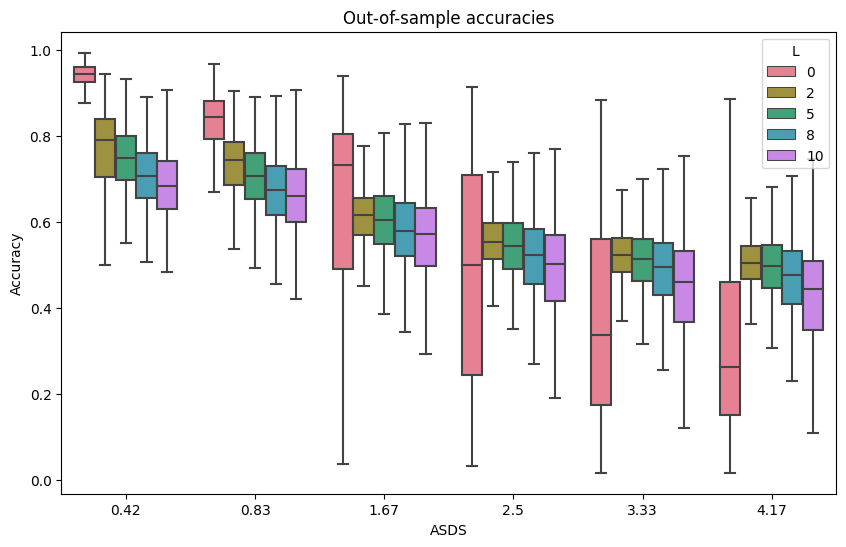

In [4]:
df_melted = pd.DataFrame([[l, σ, acc[si, seedi, li]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
df_melted.columns = ['L', 'Sigma', 'Value']
df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)
plt.xlabel("ASDS")
plt.ylabel('Accuracy')
plt.title('Out-of-sample accuracies')
plt.show()

#### Average state duration

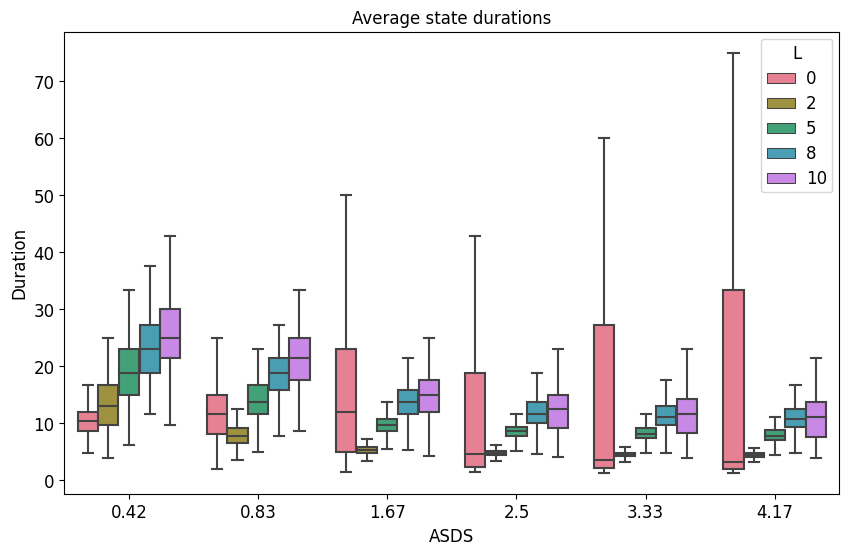

In [5]:
df_melted = pd.DataFrame([[l, σ, d[si, seedi, li]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
df_melted.columns = ['L', 'Sigma', 'Value']
df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)

plt.setp(gfg.get_legend().get_texts(), fontsize='12')  
plt.setp(gfg.get_legend().get_title(), fontsize='12')  
gfg.tick_params(labelsize=12)

plt.xlabel("ASDS", fontsize='12')
plt.ylabel('Duration', fontsize='12')
plt.title('Average state durations')
plt.show()

##### Back-and-forth shifting rate

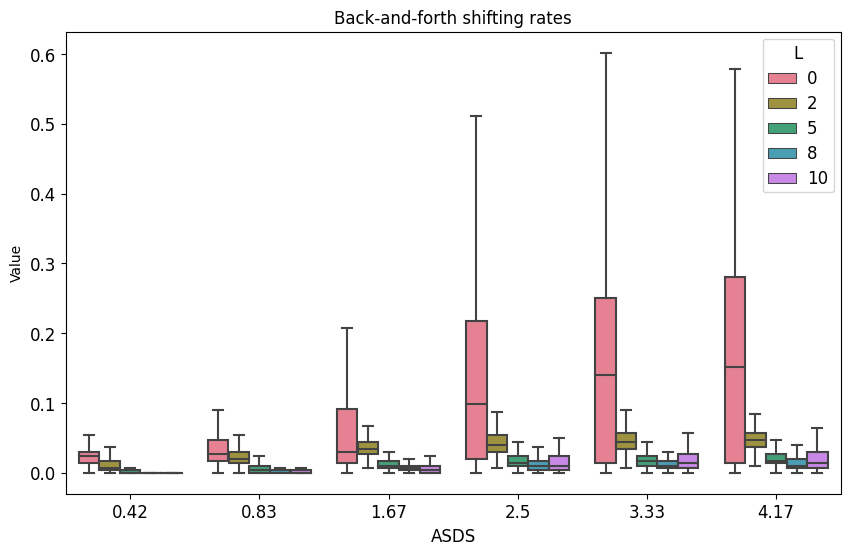

In [6]:
df_melted = pd.DataFrame([[l, σ, baf[si, seedi, li]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
df_melted.columns = ['L', 'Sigma', 'Value']
df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)

plt.setp(gfg.get_legend().get_texts(), fontsize='12')  
plt.setp(gfg.get_legend().get_title(), fontsize='12')  
gfg.tick_params(labelsize=12)

plt.xlabel("ASDS", fontsize='12')
plt.title('Back-and-forth shifting rates')
plt.show()